In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Analysis functions

### Preprocessing

In [14]:
def get_bdp(): 
    outRate = 2 * 10**6 # 2 Mbps
    rtt = 5 * 4 * 10**-3 # 5ms one link, total return time is 20ms
    bdp = outRate * rtt / 8 # 2Mbps / 8b * 20ms = 5000B
    return bdp

def clean_colums(df):
    bdp = get_bdp()
    df['queue_size'] = df['queue_size'].str.rstrip('B').astype(float)
    df['queue_size'] = df['queue_size'] / bdp
    df['actual_rate_mbps'] = df['actual_rate'] / 1e6  # Convert to Mbps
    df['rate_mbps'] = df['rate'] / 1e6  # Convert to Mbps
    df['rx_rate_mbps'] = df['rx_rate'] / 1e6  # Convert to Mbps
    df['diff_mbps'] =  df['rx_rate_mbps'] - df['actual_rate_mbps'] # df['rate_mbps'] - df['actual_rate_mbps']
    df['error_rate'] = df['diff_mbps'] / df['actual_rate_mbps']
    return df


### Plots

In [15]:
def plot_throughput(df):
    plt.figure(figsize=(10, 6))
    for burst, group in df.groupby('burst'):
        group_sorted = group.sort_values('queue_size')
        plt.plot(group_sorted['queue_size'], group_sorted['rx_rate_mbps'],
                marker='o', label=f'Burst {burst}')

    plt.xlabel('Queue Size (BDP)')
    plt.ylabel('Actual Rate (Mbps)')
    plt.title('Actual Rate vs Queue Size for Different Burst Sizes')
    plt.xscale('log')  # Optional: log scale for wide range
    plt.grid(True, which='both', linestyle='--')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [16]:
def plot_estimated_rate(df):
    plt.figure(figsize=(10, 6))
    for burst, group in df.groupby('burst'):
        group_sorted = group.sort_values('queue_size')
        plt.plot(group_sorted['queue_size'], group_sorted['rate_mbps'],
                marker='o', label=f'Burst {burst}')

    plt.xlabel('Queue Size (BDP)')
    plt.ylabel('Estimated Rate (Mbps)')
    plt.title('Estimated rate vs Queue Size for Different Burst Sizes')
    plt.xscale('log')  # Optional: log scale for wide range
    plt.grid(True, which='both', linestyle='--')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [17]:
def plot_error_rate(df):
    plt.figure(figsize=(10, 6))
    for burst, group in df.groupby('burst'):
        group_sorted = group.sort_values('queue_size')
        plt.plot(group_sorted['queue_size'], group_sorted['error_rate'],
                marker='o', label=f'Burst {burst}')

    plt.xlabel('Queue Size (BDP)')
    plt.ylabel('Error Rate')
    plt.title('Error Rate vs Queue Size for Different Burst Sizes')
    plt.xscale('log')  # Optional: log scale for wide range
    plt.grid(True, which='both', linestyle='--')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [18]:
def plot_throughput_difference(df):
    plt.figure(figsize=(8, 6))
    for burst_val, grp in df.groupby('burst'):
        # sort by queue_size so lines connect in order
        grp = grp.sort_values('queue_size')
        plt.plot(grp['queue_size'], grp['diff_mbps'], marker='o', label=f'burst={int(burst_val)}')

    plt.xlabel('Queue Size (BDP)')
    plt.ylabel('Rate - Actual Rate (Mbps)')
    plt.title('Impact of Queue Size & Burst on Rate Difference')
    plt.legend(title='Burst Size')
    plt.xscale('log')  
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Shaping with constant packet size

In [19]:
file = "data/results_shaping.csv"
df = pd.read_csv(file)
df = clean_colums(df)

### Throughput (at Rx)

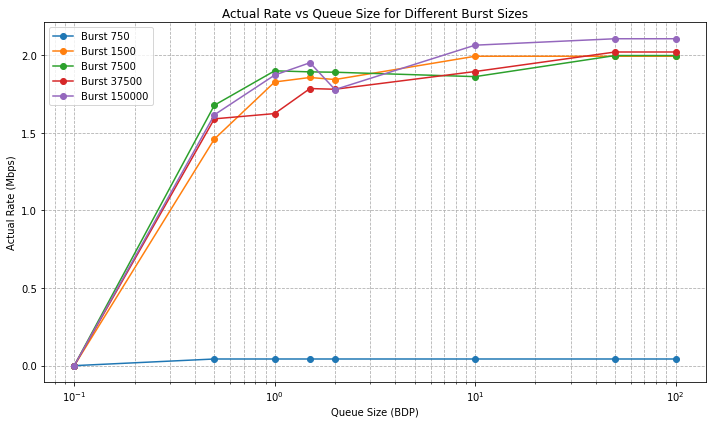

In [20]:
plot_throughput(df)

### Estimated policing rate

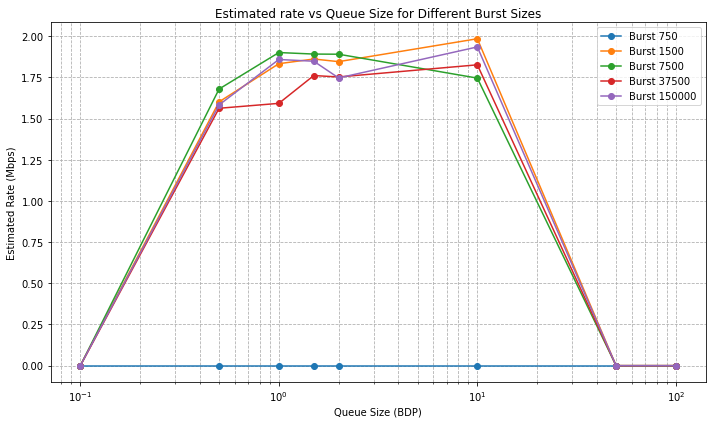

In [21]:
plot_estimated_rate(df)

### Error rate

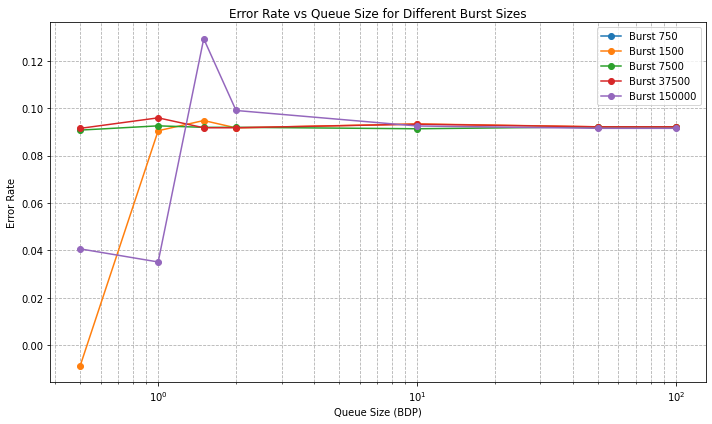

In [22]:
plot_error_rate(df)

### Throughput difference

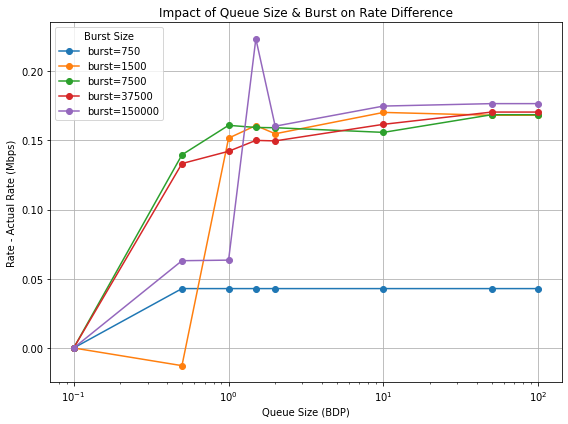

In [23]:
plot_throughput_difference(df)